## Sprint23 ゲート付きリカレントニューラルネットワーク
### KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


Recurrentレイヤー - Keras Documentation

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


>SimpleRNN

>GRU

>LSTM

>ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


LSTMのサンプルコード


keras/imdb_lstm.py at master · keras-team/keras


ConvLSTM2Dのサンプルコード


keras/conv_lstm.py at master · keras-team/keras


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [1]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.datasets import imdb

import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

Using TensorFlow backend.


### SimpleRNN

In [3]:
max_features = 100
# cut texts after this number of words (among top max_features most common words)
maxlen = 10
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 10)
x_test shape: (25000, 10)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 17s 678us/step - loss: 0.6859 - accuracy: 0.5500 - val_loss: 0.6652 - val_accuracy: 0.5907
Epoch 2/5
25000/25000 [==============================] - 16s 622us/step - loss: 0.6698 - accuracy: 0.5803 - val_loss: 0.6625 - val_accuracy: 0.5935
Epoch 3/5
25000/25000 [==============================] - 16s 625us/step - loss: 0.6655 - accuracy: 0.5883 - val_loss: 0.6632 - val_accuracy: 0.5956
Epoch 4/5
25000/25000 [==============================] - 16s 656us/step - loss: 0.6624 - accuracy: 0.5927 - val_loss: 0.6595 - val_accuracy: 0.5990
Epoch 5/5
25000/25000 [==============================] - 4s 153us/step
Test score: 0.6618324282264709
Test accuracy: 0.5985999703407288


### GRU

In [2]:
max_features = 100
# cut texts after this number of words (among top max_features most common words)
maxlen = 10
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 10)
x_test shape: (25000, 10)
Build model...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 37s 1ms/step - loss: 0.6685 - accuracy: 0.5766 - val_loss: 0.6645 - val_accuracy: 0.5858
Epoch 2/5
25000/25000 [==============================] - 36s 1ms/step - loss: 0.6579 - accuracy: 0.6004 - val_loss: 0.6624 - val_accuracy: 0.5921
Epoch 3/5
25000/25000 [==============================] - 43s 2ms/step - loss: 0.6568 - accuracy: 0.5996 - val_loss: 0.6631 - val_accuracy: 0.5892
Epoch 4/5
25000/25000 [==============================] - 43s 2ms/step - loss: 0.6541 - accuracy: 0.6037 - val_loss: 0.6626 - val_accuracy: 0.5905
Epoch 5/5
25000/25000 [

### LSTM

In [4]:
# LSTM
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''

max_features = 100
# cut texts after this number of words (among top max_features most common words)
maxlen = 10
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 10)
x_test shape: (25000, 10)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 41s 2ms/step - loss: 0.6686 - accuracy: 0.5790 - val_loss: 0.6575 - val_accuracy: 0.5975
Epoch 2/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.6575 - accuracy: 0.6006 - val_loss: 0.6556 - val_accuracy: 0.5988
Epoch 3/5
25000/25000 [==============================] - 41s 2ms/step - loss: 0.6550 - accuracy: 0.5984 - val_loss: 0.6541 - val_accuracy: 0.6010
Epoch 4/5
25000/25000 [==============================] - 42s 2ms/step - loss: 0.6526 - accuracy: 0.6021 - val_loss: 0.6534 - val_accuracy: 0.6002
Epoch 5/5
25000/25000 [==============================] - 10s 394us/step
Test score: 0.6523966860580445
Test accuracy: 0.6010400056838989


###  ConvLSTM2D

In [5]:
# ConvLSTM2D
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1
    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=100)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 54
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]
    
    
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

Train on 95 samples, validate on 5 samples
Epoch 1/5
95/95 [==============================] - 141s 1s/step - loss: 0.8186 - val_loss: 0.6744
Epoch 2/5
95/95 [==============================] - 93s 979ms/step - loss: 0.4858 - val_loss: 0.6555
Epoch 3/5
95/95 [==============================] - 105s 1s/step - loss: 0.3678 - val_loss: 0.6286
Epoch 4/5
95/95 [==============================] - 94s 994ms/step - loss: 0.2695 - val_loss: 0.5961
Epoch 5/5
95/95 [==============================] - 121s 1s/step - loss: 0.1761 - val_loss: 0.5370


Train on 950 samples, validate on 50 samples
Epoch 1/10
950/950 [==============================] - 1342s 1s/step - loss: 0.2710 - val_loss: 0.3752
Epoch 2/10
950/950 [==============================] - 948s 998ms/step - loss: 0.0267 - val_loss: 0.2713
Epoch 3/10
950/950 [==============================] - 929s 978ms/step - loss: 0.0040 - val_loss: 0.3177
Epoch 4/10
950/950 [==============================] - 1020s 1s/step - loss: 0.0013 - val_loss: 0.4508
Epoch 5/10
950/950 [==============================] - 904s 951ms/step - loss: 7.7070e-04 - val_loss: 0.3736
Epoch 6/10
950/950 [==============================] - 1008s 1s/step - loss: 5.9516e-04 - val_loss: 0.0301
Epoch 7/10
950/950 [==============================] - 963s 1s/step - loss: 4.8680e-04 - val_loss: 0.0029
Epoch 8/10
950/950 [==============================] - 1018s 1s/step - loss: 4.1864e-04 - val_loss: 4.7254e-04
Epoch 9/10
950/950 [==============================] - 1262s 1s/step - loss: 3.6897e-04 - val_loss: 3.2070e-04
Epoc

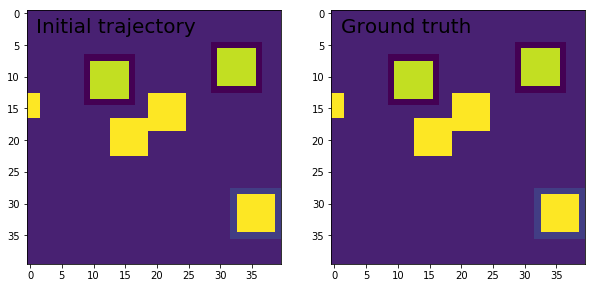

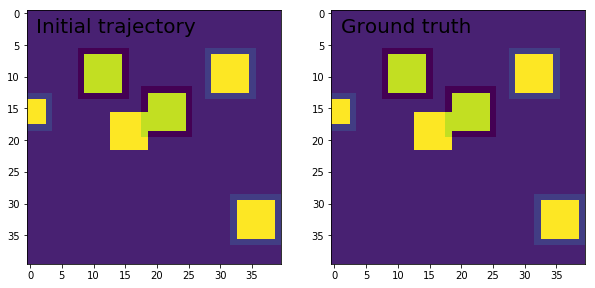

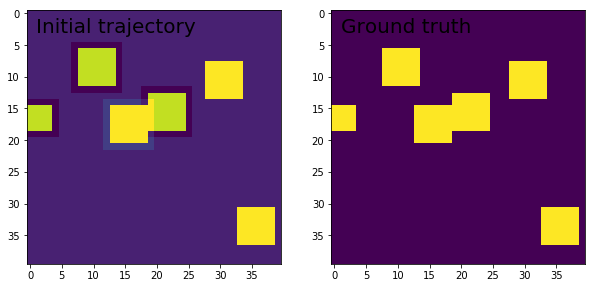

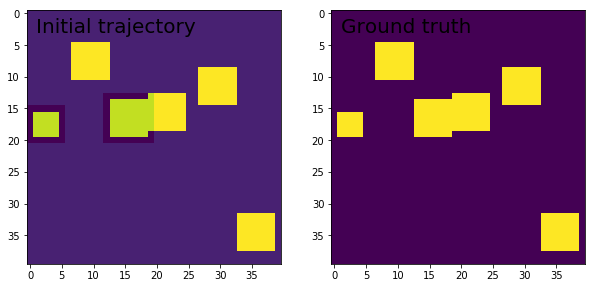

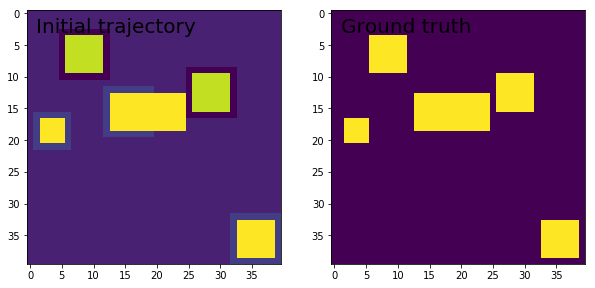

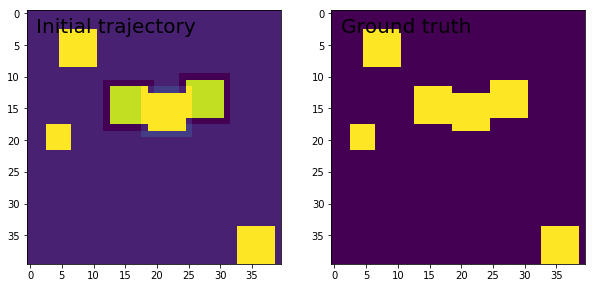

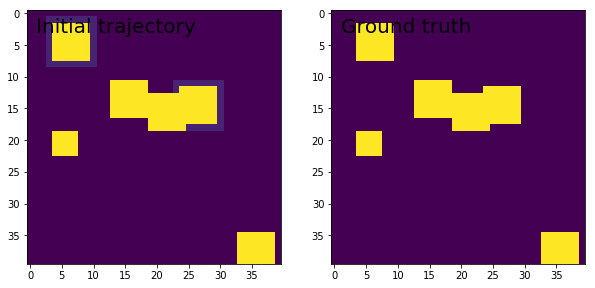

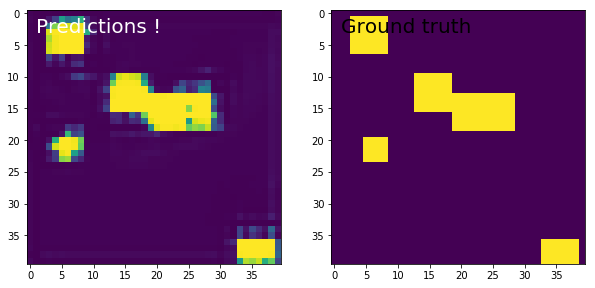

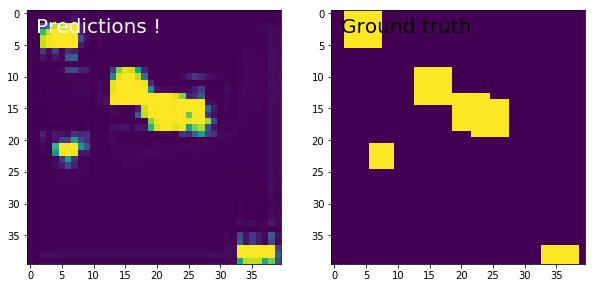

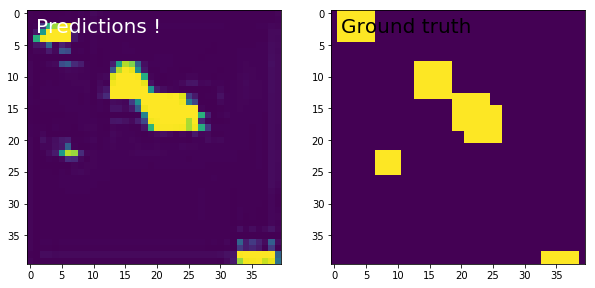

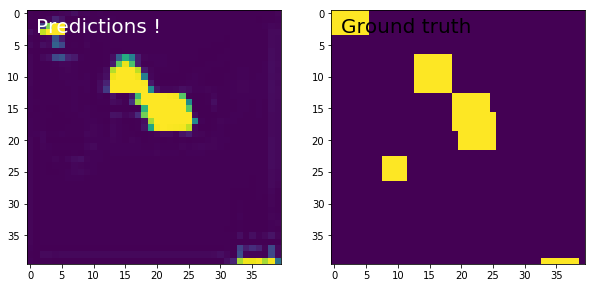

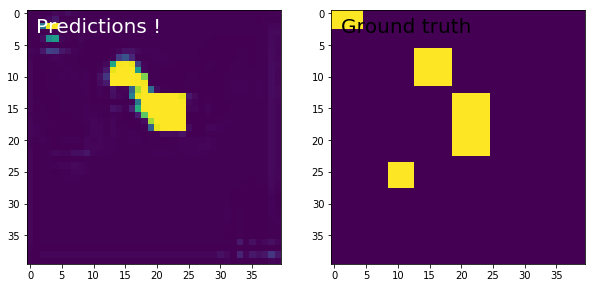

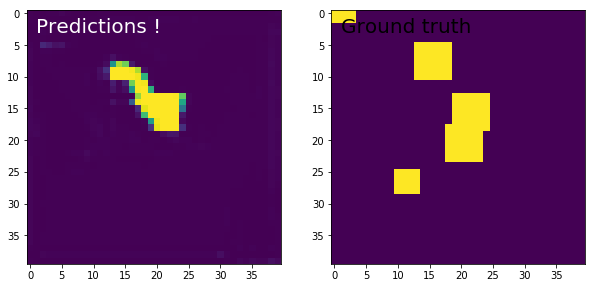

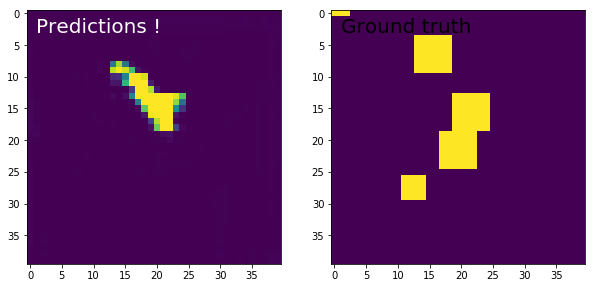

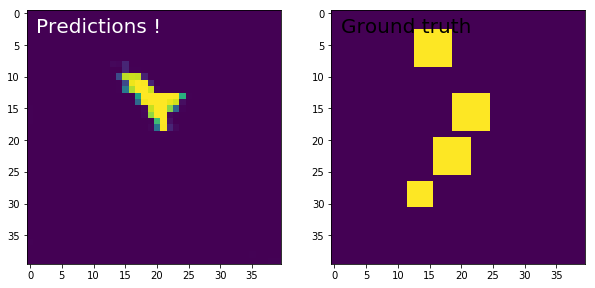

In [7]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

### 【問題2】（アドバンス課題）複数のデータセット間での比較

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


#### RNN
Recurrentレイヤーに対する基底クラス

#### SimpleRNNCell
SimpleRNN層のCellクラス(セル：レイヤーのサブクラス、実際の計算コンポーネント)

#### GRUCell
GRU層のCellクラス(セル：レイヤーのサブクラス、実際の計算コンポーネント)

#### LSTMCell
LSTM層のCellクラス(セル：レイヤーのサブクラス、実際の計算コンポーネント)

#### StackedRNNCells
RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー。
効率的なstacked RNNを実装するために使われる。

#### CuDNNGRU
CuDNNを利用した高速なGRU実装。TensorFlowバックエンドでGPU上でのみ動作する。
CuDNNとはNVIDIAのNN用GPU高速化ライブラリ。

#### CuDNNLSTM
CuDNNを利用した高速なLSTM実装。TensorFlowバックエンドでGPU上でのみ動作する。
CuDNNとはNVIDIAのNN用GPU高速化ライブラリ。